Name: S U Swakath

Roll No: 180020036

 Classification:

 1. Linear regression
 2. Logistic regression

 3. Support vector machine


# Linear regression

1. Generate 1D data synthetically
2. Take the earlier designed linear regression class
3. Find the fitting line 
4. Taking 0.5 as threshold, see the classification    

(200,)


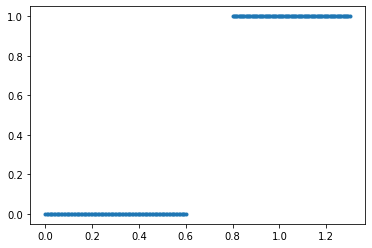

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# insert your code here

#generating class 0
numPoints = 100
values = np.linspace(0,0.6,numPoints)
dataClass = np.zeros(numPoints)
data = np.vstack((values,dataClass))
data = data.T

#generating class 1
numPoints = 100
values = np.linspace(0.8,1.3,numPoints)
dataClass = np.ones(numPoints)
data1 = np.vstack((values,dataClass))
data1 = data1.T

#merging data
data = np.vstack((data,data1))

#plotting
print(np.shape(data[:,0]))
plt.plot(data[:,0],data[:,1],'.')

Defining linear regression class

In [ ]:
# linear regression class
class regression:
# Constructor
    def _init_(self, name='reg'):
        self.name = name # Create an instance variable
    # def f(x):
    #   return 1/x
    def grad_update(self,w_old,lr,y,x):
        # write your code here
        w = w_old + (2*lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
        return w
    def error(self,w,y,x):
        return (np.sum(np.square(y - (x.T@w))))/(y.shape[0])# write your code here
    def mat_inv(self,y,x_aug):
        return (np.linalg.pinv(x_aug@x_aug.T))@(x_aug@y)# write your code here
    # by Gradien descent
    def grad_des(self,y,x,lr,eps=0.000001):
        # write your code here
        w_old = np.random.rand(x.shape[0],1)
        error1 = 100001.
        error2 = 100000.
        err = []
        while (error1 - error2)>eps:
            error1 = self.error(w_old,y,x)
            w_old = self.grad_update(w_old,lr,y,x)
            error2 = self.error(w_old,y,x)
            err.append(error1)
        w_pred = w_old
        return w_pred,err

Data augmentation and optimal weight generation

In [ ]:
x = data[:,0]
y = data[:,1]
x=x[:,np.newaxis] 
x=x.T     # to make this in M x N format, where M is the dimension
print(x.shape)
x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)

y=y[:,np.newaxis]

ln_reg=regression()
w_opt_mi=ln_reg.mat_inv(y,x_aug)

w_opt_gd = ln_reg.grad_des(y,x_aug,0.2,10**(-8))

w_opt = w_opt_mi
error = w_opt_gd[1]

(1, 200)
(2, 200)


1. Optimal separating plane generation
2. Classification (0.5 as threshold)


[[-0.25988351]
 [ 1.12575335]]


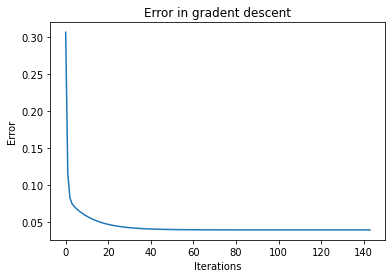

(1, 1000)
(2, 200)
(1, 200)
[0.675]


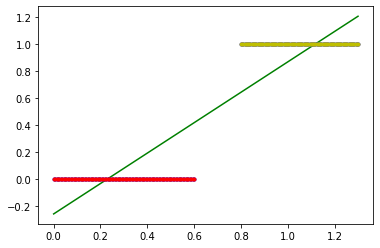

In [ ]:
print(w_opt)
lr=0.01

x_axis = range(len(error))
plt.plot(x_axis,error)
plt.title('Error in gradent descent')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

x_plot = np.linspace(0,1.3,1000)
x_plot=x_plot[:,np.newaxis] 
x_plot=x_plot.T     # to make this in M x N format, where M is the dimension
x_augplot=np.concatenate((np.ones((1,x_plot.shape[1])), x_plot),axis=0)

y_plot = w_opt.T@x_augplot
print(y_plot.shape)
print(x_aug.shape)
print(x.shape)
plt.plot(x_plot.T,y_plot.T,'g')
# insert your code here

th = 0.5
x_th = (th - w_opt[0])/w_opt[1]
print(x_th)


class1 = []
class2 = []

for point in x.T:
    if(point<x_th):
        class1.append(point)
    else:
        class2.append(point)

class1 = np.array(class1)
class2 = np.array(class2)
plt.plot(data[:,0],data[:,1],'b.')
plt.plot(class1,np.zeros(len(class1)),'r.')
plt.plot(class2,np.ones(len(class2)),'y.')
plt.show()

## Draw back of linear regression based classification
1. Generate data (have outlairs noise)
2. Find the fitting line.
3. Using 0.5 as threshold, see the classification
4. using matrix inversion (home work)


(700,)


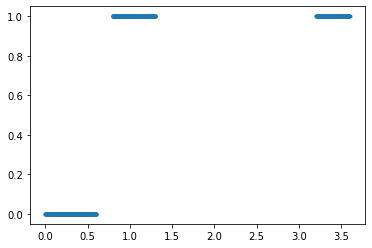

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# insert your code here
#generating class 0
numPoints = 300
values = np.linspace(0,0.6,numPoints)
dataClass = np.zeros(numPoints)
data = np.vstack((values,dataClass))
data = data.T

#generating class 1
numPoints = 300
values = np.linspace(0.8,1.3,numPoints)
dataClass = np.ones(numPoints)
data1 = np.vstack((values,dataClass))
data1 = data1.T

numPoints = 100
values = np.linspace(3.2,3.6,numPoints)
dataClass = np.ones(numPoints)
data_temp = np.vstack((values,dataClass))
data_temp = data_temp.T

data1 = np.vstack((data1,data_temp))

#merging data
data = np.vstack((data,data1))

#plotting
print(np.shape(data[:,0]))
plt.plot(data[:,0],data[:,1],'.')

Augment data

In [ ]:
# Augment data
x = data[:,0]
y = data[:,1]
x=x[:,np.newaxis] 
x=x.T     # to make this in M x N format, where M is the dimension
print(x.shape)
x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)

y=y[:,np.newaxis]

ln_reg=regression()
w_opt_mi=ln_reg.mat_inv(y,x_aug)

w_opt_gd = ln_reg.grad_des(y,x_aug,0.2,10**(-8))

w_opt = w_opt_mi
error = w_opt_gd[1]

(1, 700)
(2, 700)


1. find optimal weight
2. perform classification (0.5 as threshold)

Matrix inversion [[0.24057767]
 [0.31086662]]
Gradient decent [[0.24037882]
 [0.31098344]]


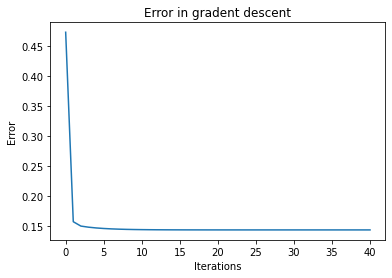

(1, 1000)
(2, 700)
(1, 700)
[0.83451331]


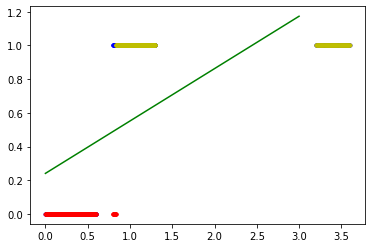

<Figure size 720000x720000 with 0 Axes>

In [ ]:
print("Matrix inversion",w_opt)
print("Gradient decent",w_opt_gd[0])
lr=0.01

x_axis = range(len(error))
plt.plot(x_axis,error)
plt.title('Error in gradent descent')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()


x_plot = np.linspace(0,3,1000)
x_plot=x_plot[:,np.newaxis] 
x_plot=x_plot.T     # to make this in M x N format, where M is the dimension
x_augplot=np.concatenate((np.ones((1,x_plot.shape[1])), x_plot),axis=0)

y_plot = w_opt.T@x_augplot
print(y_plot.shape)
print(x_aug.shape)
print(x.shape)
plt.plot(x_plot.T,y_plot.T,'g')
# insert your code here

th = 0.5
x_th = (th - w_opt[0])/w_opt[1]
print(x_th)


class1 = []
class2 = []

for point in x.T:
    if(point<x_th):
        class1.append(point)
    else:
        class2.append(point)

class1 = np.array(class1)
class2 = np.array(class2)

plt.plot(data[:,0],data[:,1],'b.')
plt.plot(class1,np.zeros(len(class1)),'r.')
plt.plot(class2,np.ones(len(class2)),'y.')
plt.figure(figsize=(10000,10000))
plt.show()

# logistic regression
1. Error surface (logistic loss vs. MSE)
2. Solve the outlair issue
3. Circularly separable data classification
4. Multiclass classification

## Error surface (logistic loss vs. MSE)

(25,)
(25,)
(25, 2)


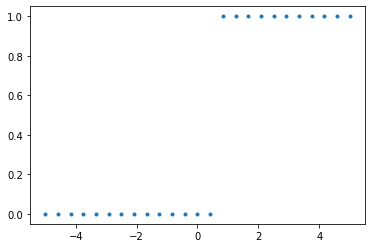

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')
print(np.shape(x))
print(np.shape(y))

m = len(x)
ones = np.ones((m,2))
ones[:,1:] = np.array([x]).T
x_aug = ones
print(np.shape(x_aug))


1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [ ]:
import math
# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)


def hypo_func(x,w):
    power = x@w
    np.shape(power)
    return 1/(1 + np.exp(-1.0*power))

def mse(y,x,w):
    n,m = np.shape(x)
    diff = hypo_func(x,w)-y
    sq = np.square(diff)
    sum = np.sum(sq)
    return sum/(2*n)

def logisticLoss(y,x,w):
    n,m = np.shape(x)
    yp = hypo_func(x,w)
    h1 = np.where(yp==0,1e-100,yp)
    h0 = np.where(yp==1,0.999999999999,yp)
    sum = (-y*np.log(h1)-(1-y)*np.log(1-h0)).mean()
    return sum

X = x_aug
Y = np.array([y])
Y = Y.T

cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):
    # MSE
    w = np.array([[w0],[w1[i]]])
    cost_mse = mse(Y,X,w)
    cost_fn_mse.append(cost_mse)

    # Cost function using log
    cost_logis = logisticLoss(Y,X,w)
    cost_fn_logis.append(cost_logis)

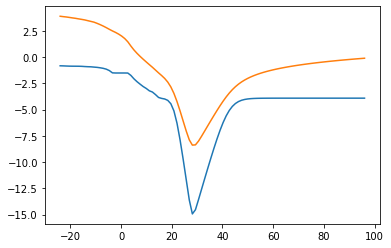

In [ ]:
# ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse))
plt.plot(w1,np.log(cost_fn_logis))
plt.show()


## Solve the outlier issue


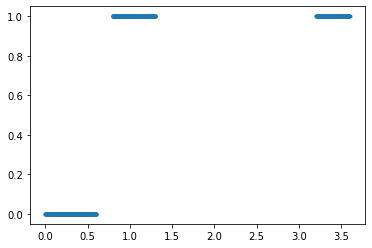

(700,)


In [ ]:
# logistic regression
import numpy as np
import matplotlib.pyplot as plt

# insert your code here
#generating class 0
numPoints = 300
values = np.linspace(0,0.6,numPoints)
dataClass = np.zeros(numPoints)
data = np.vstack((values,dataClass))
data = data.T

#generating class 1
numPoints = 300
values = np.linspace(0.8,1.3,numPoints)
dataClass = np.ones(numPoints)
data1 = np.vstack((values,dataClass))
data1 = data1.T

numPoints = 100
values = np.linspace(3.2,3.6,numPoints)
dataClass = np.ones(numPoints)
data_temp = np.vstack((values,dataClass))
data_temp = data_temp.T

data1 = np.vstack((data1,data_temp))

#merging data
data = np.vstack((data,data1))

x= data[:,0]
y= data[:,1]

plt.figure()
plt.plot(x,y,'.')
plt.show()

print(np.shape(x))

In [ ]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable
  
  def logis(self,x,w_old):
    power = x@w_old
    return 1/(1 + np.exp(-1.0*power))
    
  def grad_update(self,w_old,lr,y,x):
    # write your code here
    x = x.T
    w = w_old + (lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
    return w

  def error(self,w,y,x):
    n,m = np.shape(x)
    yp = hypo_func(x,w)
    h1 = np.where(yp==0,1e-100,yp)
    h0 = np.where(yp==1,0.999999999999,yp)
    sum = (-y*np.log(h1)-(1-y)*np.log(1-h0)).mean()
    return sum
    
    # by Gradien descent
  def Regression_grad_des(self,x,y,w_in,lr,eps = 1e-20):
    w_old = w_in
    print("Inside function",w_old)
    error1 = self.error(w_old,y,x)
    err=[]
    err.append(error1)
    i = 1
    while (1):
      w_old = self.grad_update(w_old,lr,y,x)
      error1 = self.error(w_old,y,x)
      err.append(error1)
      if ((err[i-1]-err[i])<eps):
        break
      i+=1
      if (i%10000 == 0):
        print("In progress...",i)
    w_pred = w_old
    print("Inside fun",w_pred.shape)
    return w_pred,err

In [ ]:
# augmentation and data formating
x = data[:,0]
y = data[:,1]
y=y[:,np.newaxis]
print(x.shape)
x_aug=np.vstack((np.ones(x.shape[0]),x))
x_aug = x_aug.T
print(x_aug.shape)
print(y.shape)

(700,)
(700, 2)
(700, 1)


In [ ]:
log_reg=logis_regression()
eps = 10**(-20)
w_in = np.array([[-2],[10]])
w_pred1,err_list=log_reg.Regression_grad_des(x_aug,y,w_in,0.0001,eps)
print(w_pred1)
print(len(err_list))
#plt.plot(err)

Inside function [[-2]
 [10]]
Inside fun (2, 1)
[[-3.5517757 ]
 [ 5.72933409]]
3432


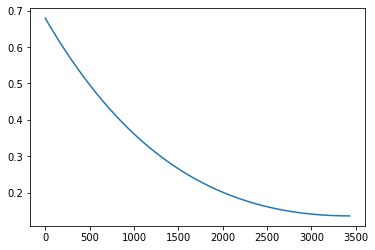

In [ ]:
plt.plot(err_list)
plt.show()

(1000,)


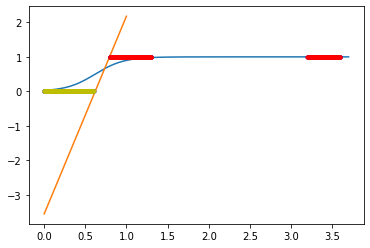

<Figure size 720000x720000 with 0 Axes>

In [ ]:
# output computa
x_graph = np.linspace(0,3.7,1000)
x_graph_all = np.vstack((np.ones(len(x_graph)),x_graph))
print(x_graph.shape)
y_graph =1/(1+ np.exp(-1*(x_graph_all.T@w_pred1)))
x_g1 = np.linspace(0,1,1000)
x_g1_all = np.vstack((np.ones(len(x_g1)),x_g1))
y_g1 = x_g1_all.T@w_pred1
plt.plot(x_graph,y_graph)
plt.plot(x_g1,y_g1)
# # insert your code here
y_pred = log_reg.logis(x_aug,w_pred1)

class1 = np.where(y_pred[:,0]>=0.5)
class2 = np.where(y_pred[:,0]<0.5)

class1 = x_aug[class1,1]
class2 = x_aug[class2,1]

plt.plot(data[:,0],data[:,1],'b.')
plt.plot(class1,np.ones(len(class1)),'r.')
plt.plot(class2,np.zeros(len(class2)),'y.')
plt.figure(figsize=(10000,10000))
plt.show()

## Classification of circularly separated data using logistic regression



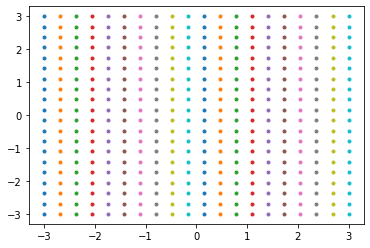

In [ ]:
# Generating circularly separated data
import numpy as np
import matplotlib.pyplot as plt


x1=np.linspace(-3,3,20)
y1=np.linspace(-3,3,20)

x11,y11=np.meshgrid(x1,y1)
plt.plot(x11,y11,'.')
plt.show()

1. Circularly separated data generation

initial x (400, 2)
Inner circle (32, 2)
outer Circle (332, 2)
Final X (364, 2)


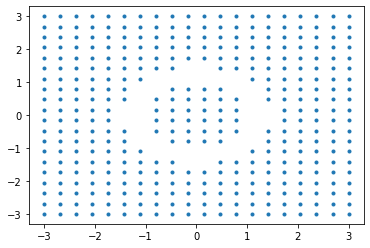

In [ ]:
x2=x11.flatten()
y2=y11.flatten()

circData=np.concatenate((x2[:,np.newaxis],y2[:,np.newaxis]),axis=1) # to make matrix format
x = circData
print("initial x",x.shape)

aind=np.where((x[:,0]**(2)+x[:,1]**(2))<=0.9)

bind=np.where((x[:,0]**(2)+x[:,1]**(2))>=2.2)

inner=x[aind[0],:]
outer=x[bind[0],:]
print("Inner circle",inner.shape)
print("outer Circle",outer.shape)
x=np.concatenate((inner,outer))
circData = x
print("Final X",circData.shape)

plt.plot(circData[:,0],circData[:,1],'.')
plt.show()

As in case of circularly separated data, the boundary is nonlinear, so squred feature is taken.

In [ ]:
# perform logistic regression

y1=np.zeros((inner.shape[0]))
y2=np.ones((outer.shape[0]))
y_circ=np.concatenate((y1,y2))
y_circ = y_circ[:,np.newaxis]
print(y.shape)
all_x = circData[:,0]
all_y = circData[:,1]
sqX = np.square(all_x)
sqY = np.square(all_y)
XY = np.multiply(all_x,all_y)
ones = np.ones(all_x.shape[0])
print(sqX.shape)
print(sqY.shape)
print(XY.shape)
print(ones.shape)

x_aug_circ = np.vstack((ones,sqX,sqY,XY)) 
x_aug_circ = x_aug_circ.T
print(x_aug_circ.shape)

(700, 1)
(364,)
(364,)
(364,)
(364,)
(364, 4)


Inside function [[-1]
 [ 3]
 [ 3]
 [ 0]]
Inside fun (4, 1)


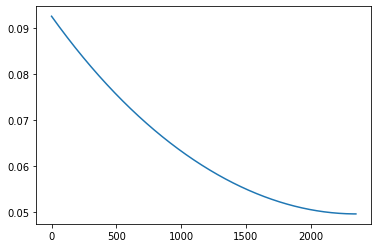

In [ ]:
log_reg_circ = logis_regression() 
w_in = np.array([[-1],[3],[3],[0]])
eps = 1e-20
lr = 0.00001
w_pred_circ,err_circ=log_reg_circ.Regression_grad_des(x_aug_circ,y_circ,w_in,lr,eps)
plt.plot(err_circ)
plt.show()

Plot classification using 0.5 as threshold

(364, 1)
ins (1, 32)
(364, 2)
(332, 2)
(32, 2)


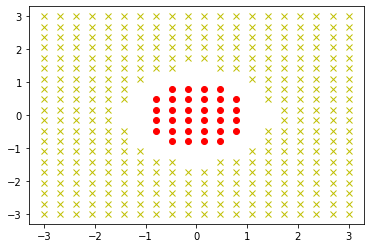

In [ ]:
y_pred_circ=log_reg.logis(x_aug_circ,w_pred_circ)
print(y_pred_circ.shape)
# insert your code here
ind1 = np.where(y_pred_circ[:,0]>=0.5)
ind2 = np.where(y_pred_circ[:,0]<0.5)
ind2= np.array(ind2)
ind1= np.array(ind1)
print("ins",ind2.shape)
x00=circData[ind1[0,:],:]
x11=circData[ind2[0,:],:]
print(circData.shape)
print(x00.shape)
print(x11.shape)
plt.figure()
plt.plot(x00[:,0],x00[:,1],'x',color='y')
plt.plot(x11[:,0],x11[:,1],'o',color='r')
plt.show()

## Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. lets take polynomial of order 2 (by seeing the data distribution)

(364, 2)


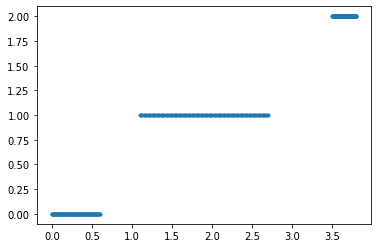

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x_multi=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y_multi=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x_multi,y_multi,'.')
plt.show()

In [ ]:
def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

In [ ]:
x_aug_multi=data_transform(x_multi[np.newaxis,:],2)
print(x_aug_multi.shape)

(3, 300)


In [ ]:
# plot for classification
def plot_op(x,y_pred):
  # insert your code here
  ind0 = np.where(y_pred[:,0]<0.5)
  ind1 = np.where(y_pred[:,0]>=0.5)
  ind0 = np.array(ind0)
  ind1 = np.array(ind1)
  x0=x[ind0[0,:],:]
  x1=x[ind1[0,:],:]
  plt.plot(x0[:,0],np.zeros((x0).shape),'o',color='y')
  plt.plot(x1[:,0],np.ones((x1).shape),'x',color='r')

Inside function [[-3]
 [ 4]
 [ 1]]
Inside fun (3, 1)
[[-3.05402455]
 [ 3.80912007]
 [ 0.34159628]]


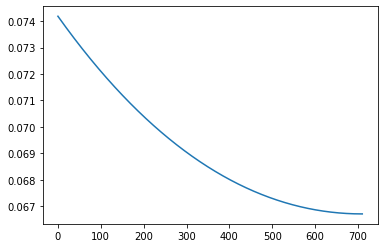

In [ ]:
#Working on class1
# insert your code here
log_reg_multi = logis_regression() 

w_in_1 = np.array([[-3],[4],[1]])
eps = 1e-20
lr = 0.00001

y_class1 = np.concatenate((np.zeros(x1.shape),np.ones(x2.shape),np.ones(x3.shape)))
y_class1 = y_class1[:,np.newaxis]
w_pred_class1,err_class1=log_reg_multi.Regression_grad_des(x_aug_multi.T,y_class1,w_in_1,lr,eps)

plt.plot(err_class1)
plt.show

print(w_pred_class1)

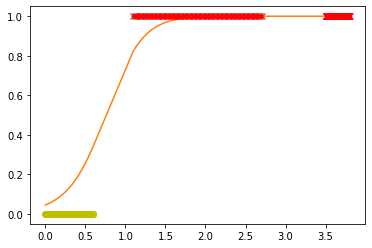

In [ ]:
# ploting for class1
plt.figure()
plt.plot(x_multi,y_class1[:,0],'.')

y_pred_class1=log_reg_multi.logis(x_aug_multi.T,w_pred_class1)
plt.plot(x_multi,y_pred_class1)
plot_op(x_multi[:,np.newaxis],y_pred_class1)
plt.show()

Inside function [[ 3]
 [-5]
 [ 2]]
Inside fun (3, 1)
[[ 2.95426001]
 [-5.15775724]
 [ 1.40684166]]


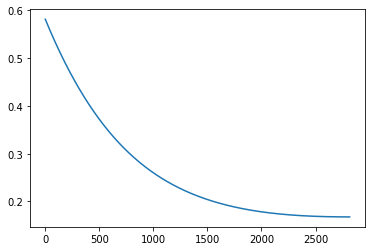

In [ ]:
#Working class 2
w_in_2 = np.array([[3],[-5],[2]])
eps = 1e-20
lr = 0.00001

y_class2 = np.concatenate((np.ones(x1.shape),np.zeros(x2.shape),np.ones(x3.shape)))
y_class2 = y_class2[:,np.newaxis]
w_pred_class2,err_class2=log_reg_multi.Regression_grad_des(x_aug_multi.T,y_class2,w_in_2,lr,eps)

plt.plot(err_class2)
plt.show

print(w_pred_class2)


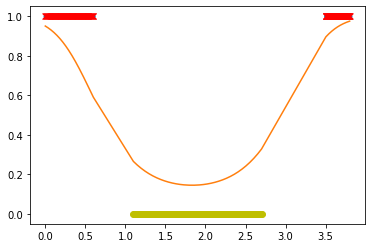

In [ ]:
# ploting class 2
# x_graph = np.linspace(0,3.7,1000)
# x_graph_all = data_transform(x_graph[np.newaxis,:],2)
# print(x_graph_all.shape)
# print(w_pred_class2.shape)
# y_g = x_graph_all.T@w_pred_class2
plt.figure()
plt.plot(x_multi,y_class2[:,0],'.')

y_pred_class2=log_reg_multi.logis(x_aug_multi.T,w_pred_class2)
plt.plot(x_multi,y_pred_class2)
plot_op(x_multi[:,np.newaxis],y_pred_class2)
#plt.plot(x_graph,y_g)
plt.show()

Inside function [[ 4]
 [ 3]
 [-1]]
Inside fun (3, 1)
[[ 3.81996569]
 [ 2.84274768]
 [-1.14930366]]


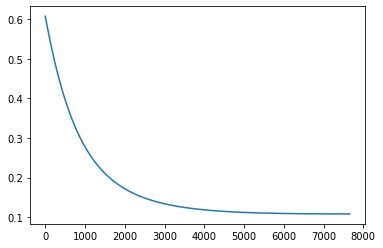

In [ ]:
#Working for class3
w_in_3 = np.array([[4],[3],[-1]])
eps = 1e-20
lr = 0.00001

y_class3 = np.concatenate((np.ones(x1.shape),np.ones(x2.shape),np.zeros(x3.shape)))
y_class3 = y_class3[:,np.newaxis]
w_pred_class3,err_class3=log_reg_multi.Regression_grad_des(x_aug_multi.T,y_class3,w_in_3,lr,eps)

plt.plot(err_class3)
plt.show

print(w_pred_class3)

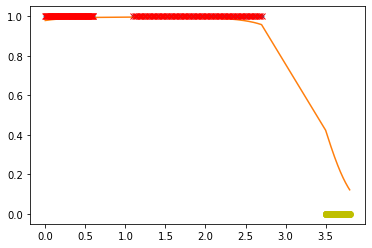

In [ ]:
#Plotting Class3
plt.figure()
plt.plot(x_multi,y_class3[:,0],'.')

y_pred_class3=log_reg_multi.logis(x_aug_multi.T,w_pred_class3)
plt.plot(x_multi,y_pred_class3)
plot_op(x_multi[:,np.newaxis],y_pred_class3)
plt.show()

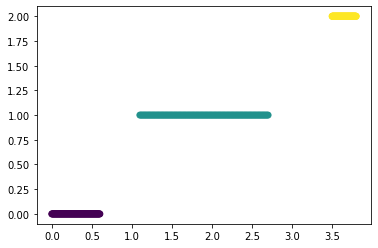

In [ ]:
# final classification
# insert your code here  # as '0' is taken as referance
# insert your code here
y_pred1 = x_aug_multi.T@w_pred_class1
y_pred2 = x_aug_multi.T@w_pred_class2
y_pred3 = x_aug_multi.T@w_pred_class3
y_final = []
for i in range(y_pred1.shape[0]):
  if (y_pred1[i,0]<y_pred2[i,0] and y_pred1[i,0]<y_pred3[i,0]):
    y_final.append(0)
  elif (y_pred2[i,0]<y_pred1[i,0] and y_pred2[i,0]<y_pred3[i,0]):
    y_final.append(1)
  elif (y_pred3[i,0]<y_pred1[i,0] and y_pred3[i,0]<y_pred2[i,0]):
    y_final.append(2)
  else:
    y_final.append(4)

y_final = np.array(y_final)
plt.figure()
plt.scatter(x_multi,y_final,c=y_final)
plt.show()

# Support vector machine

1. Try to maximize the margin of separation between data.
2. Instead of learning wx+b=0  separating hyperplane directly (like logistic regression), SVM try to learn wx+b=0, such that, the margin between two hyperplanes wx+b=1 and wx+b=-1 (also known as support vectors) is maximum. 
3. Margin between wx+b=1 and wx+b=-1 hyperplane is $\frac{2}{||w||}$
4. we have a constraint optimization problem of maximizing $\frac{2}{||w||}$, with constraints wx+b>=1 (for +ve class) and wx+b<=-1 (for -ve class).
5. As $y_{i}=1$ for +ve class and $y_{i}=-1$ for -ve class, the constraint can be re-written as:
$$y(wx+b)>=1$$

6. Final optimization is (i.e to find w and b):
$$\min_{||w||}\frac{1}{2}||w||,$$
$$y(wx+b) \geq 1,~\forall ~data $$












Acknowledgement:

https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Data generation:
1. Generate 2D gaussian data with fixed mean and variance for 2 class.(var=Identity, class1: mean[-4,-4], class2: mean[1,1], No. of data 25 from each class)
2. create the label matrix
3. Plot the generated data

(50, 2)
(50,)


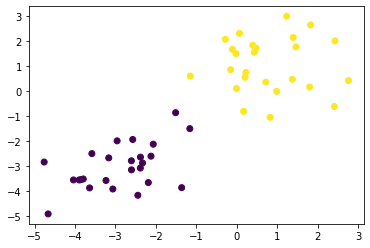

In [ ]:
No_sample=50
mean1=np.array([-3,-3])
var1=np.array([[1,0],[0,1]])
mean2=np.array([1,1])
var2=var1
data1=np.random.multivariate_normal(mean1,var1,int(No_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_sample/2))
X=np.concatenate((data1,data2))
print(X.shape)
y=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
print(y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',c=y)

Create a data dictionary, which contains both label and data points.

In [ ]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==-1:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)} 

## SVM training
1. create a search space for w (i.e w1=w2),[0, 0.5*max((abs(feat)))] and  for b, [-max((abs(feat))),max((abs(feat)))], with appropriate step.
2. we will start with a higher step and find optimal w and b, then we will reduce the step and again re-evaluate the optimal one.

3. In each step, we will take transform of w, [1,1], [-1,1],[1,-1] and [-1,-1] to search arround the w. 

4. In every pass (for a fixed step size) we will store all the w, b and its corresponding ||w||, which make the data correctly classified as per the condition $y(wx+b) \geq 1$. 

5. Obtain the optimal hyperplane having minimum ||w||.

6. Start with the optimal w and repeat the same (step 3,4 and 5) for a reduced step size.


In [ ]:
## my SVM

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y_):
        n_samples, n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        print('inside function')
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
        return self.w,-1*self.b

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

**Training**

In [ ]:
# my trainging
lr = 1e-4
lambda_param = 1e-4
n_iter = 20000
svm = SVM(lr,lambda_param,n_iter)
w,b = svm.fit(X,y)
print(w)
print(b)

inside function
[1.15485955 1.08452534]
1.6806999999998313


## Visualization of the SVM separating hyperplanes (after training)

In [ ]:
def visualize(data_dict,w,b):

        plt.scatter(X[:,0],X[:,1],marker='o',c=y)

        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        hyp_x_min = np.min([np.min(data_dict[1]),np.min(data_dict[-1])])
        hyp_x_max = np.max([np.max(data_dict[1]),np.max(data_dict[-1])])

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')        
        
        
        

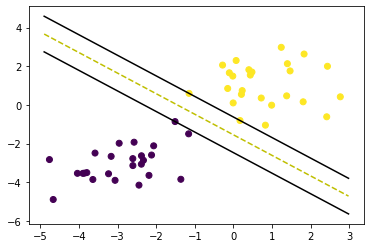

In [ ]:
fig = plt.figure()

visualize(data_dict,w,b)
plt.show()

## Testing

1. Generate test data as like training
2. See the classification

3. if $wx_{test}+b > 0$, $y_{test}=1$ else $y_{test}=-1$


test accuracy= 100.0


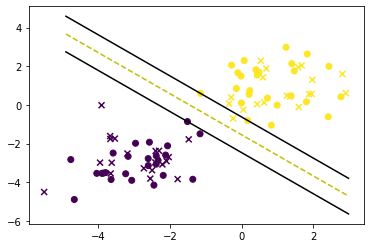

In [ ]:
No_test_sample=40
data1=np.random.multivariate_normal(mean1,var1,int(No_test_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_test_sample/2))
test_data=np.concatenate((data1,data2))
y_gr=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))


# evaluate with the trained model

y_pred=svm.predict(test_data)

sum =0
count=0
for yi,yp in zip(y_gr,y_pred):
    count +=1
    if(yi==yp):
        sum += 1

accuracy=(sum/count)*100
print('test accuracy=',accuracy)

#  Visualization
plt.figure()
visualize(data_dict,w,b)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=y_gr)